<a href="https://colab.research.google.com/github/Heiley-W/Kaggle-Machine-Learning-Notebook/blob/main/Kaggle_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: A Neuron

## 0. Introduction to Deep Learning
- [Deep Learning] Deep stacks of computation
- [Neural Network] Model of deep learning, composed of neurons which perform simple computation individually
- [A single neuron] Output ($y$) = Input ($x$) * Weight ($w$) + Bias ($b$)
- [Example 1] Input: Sugar; Output: Calories
    - (Weight) 1 g of sugar = 2.5 cal
    - Calories from other things = 80 cal
    - Total calories = 2.5 * Sugar + 80
- [Example 2] Input: Sugar, fiber, protein; Output: calories
    - (Weights) 1 g of fiber = 1 cal; 1 g of protein = 3 cal
    - Total = 2.5 * Sugar + Fiber + 3 * Protein + 80

- Understand the data
    1. Import pacakge: `import pandas as pd`.
    2. Read csv file: `data = pd.read_csv(file_path)`.
    3. Print head: `data.head()`
    4. Print the shape: `shape=data.shape` (Rows, columns)

## 1. Define a Linear Model

1. Import packages: `from tensorflow import keras`/`from tensorflow.keras import layers`
2. Identify the input shape (number of columns-1): `input_shape=shape[1]-1 `
2. Create a network with 1 linear unit through `keras.Sequential` using dense layer: `model = keras.Sequential([layers.Dense(units=1, input_shapw=[3])])`
    - `units` = (int) Number of output
    - `input_shape` = (list) Dimensions of inputs [height,width,channels]

In [15]:
import kagglehub

# Download latest version
file_path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2


In [16]:
# 0. Introduction

# Import pacakge
import pandas as pd
from pathlib import Path

# Read csv file
data = pd.read_csv(Path(file_path) / "winequality-red.csv")

# Print head
data.head()

# Prepare training and validation data
df_train = data.sample(frac=0.7, random_state=0)
df_valid = data.drop(df_train.index)
shape=df_train.shape

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

print(X_train.shape)

(1119, 11)


In [4]:
# 1. Define a Linear Model

## 1.1 Import packages

from tensorflow import keras
from tensorflow.keras import layers

## 1.2 Identify input shape (number of columns)
input_shape=shape[1]-1

## 1.3 Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[input_shape])
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Section 2: A Network

- [Layer] A group of neurons, each performing relatively simple transformation
- [Hidden layers] Layers before the output layers
- [Dense layer] Group of linear units having a common set of inputs
- [Activation function] Function to each layer's outputs that makes it non-linear, e.g. rectifier function
- [ReLU] Refers to rectified linear unit, which make all negative output into zero and bends the data (non-linear)

1. Create Seqential model to connect layers from first (input) to last (output) `model = keras.Sequential([
layers.Dense(units=4, activation='relu', input_shape=[2]), layers.Dense(units=3,activation='relu'),layers.Dense(units=1),])`

In [20]:
# 2. Deep Neural Networks

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # 1st hidden ReLU layers
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    # 2nd hidden ReLU layers
    layers.Dense(units=512, activation='relu'),
    # 3rd hidden ReLU layers
    layers.Dense(units=512, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Section 3: Training and Improving

## 1. Training the Model

- [Loss function] Measures how good the predictions are, e.g. Mean absolute error (MAE) = difference between target and prediction, mean-squared error (MSE) or the Huber loss
- [Stochastic gradient desceint] Iterative algorithms that changes the weight to the direction with the fastest change in loss. Stochastic refers to the random sampling of minibatches
- [Minibatch/ Batch] Each iteration's sample of traning data
- [Epoch] Complete round of training data
- [Optimiser] Inform network how to change its weights (slope and y-intercept) after seeing a new minibatch to obtain best fit line, e.g. Adam
- [Learning rate] Proportional to the size of the shift after seeing a new minibatch

1. Define the model (Last part)
1. Add the optimiser and loss function:
`model.compile(optimizer="adam",
loss="mae",)`
1. Fit the data `history = model.fit( X_train, y_train, validation_data=(X_valid, y_valid), batch_size=256, epochs=10,)`

## 2. Overfitting and Underfitting

- [Signal and noise in training data] Signal generalises (aid predictions of new data) and noise is only true for training data (non-informative about new data)
- [Learning curve of validation data] Graph of validation loss versus training data epochs, goes down when the model learns signal
- [Intepreting noise from learning curve] THe gap between learning curve of validation and training increases with noise the model learned
- [Capacity] Size and complexity of the patterns able to learn, determined by neuron's quantity and connection, increases by adding more layers or units
- [Early stopping] Stop the training when validation loss stops decreasing

1. Add early stopping `early_stopping = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True,
)`

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.3127 - val_loss: 0.1386
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1387 - val_loss: 0.1256
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1289 - val_loss: 0.1194
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1187 - val_loss: 0.1085
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1106 - val_loss: 0.1083
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1089 - val_loss: 0.1054
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1074 - val_loss: 0.1021
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1029 - val_loss: 0.1020
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1032 - val_loss: 0.1080
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1006 - val_loss: 0.1016


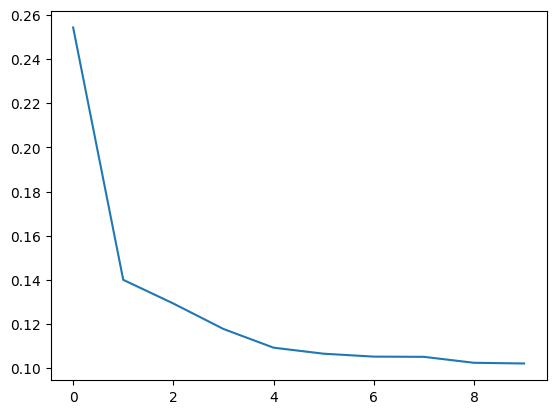

In [21]:
# 3. Training the Model

## 3.2 Add Optimiser and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

## 3.3 Fit the data
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

# Plot the loss curve
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();

Minimum validation loss: 0.09152933955192566


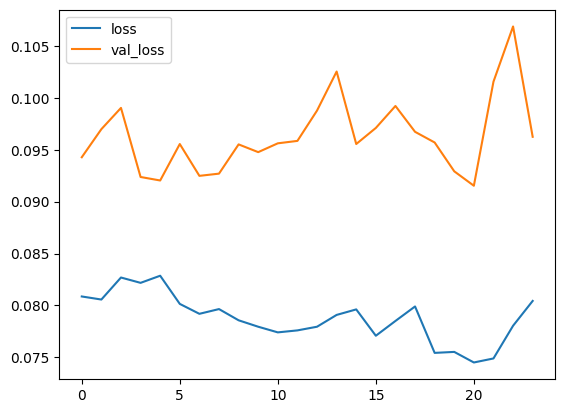

In [25]:
# 2. Overfitting and Underfitting

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

# Compare the loss curve with and without early stopping
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))